In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Analysis for US

In [ ]:
df_US=pd.read_csv('Dataset/US_Final.csv')
df_US.head(2)

In [ ]:
# Checking rows and columns in the dataframe. 

df_US.shape

In [ ]:
# Descriptive summary of the dataframe, including the number of non-null values in each columns. 

df_US.info()

In [ ]:
# Check the amount of duplicated data in the dataset

sum(df_US.duplicated())

In [ ]:
#Checking for null 

df_US.isnull().sum()

In [ ]:
df_US.columns

In [ ]:
#Droping the columns that are not included in analysis

df_US=df_US.drop(['Unnamed: 0', 'Unnamed: 0.1', 'tconst', 'ordering', 'title','region', 
       'isOriginalTitle','titleType','directors', 'writers', 'primaryTitle',],axis=1)

In [ ]:
df_US.columns=['Moviename','isAdult','Year', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'Actors',
       'Actress', 'Director']

In [ ]:
df_US['Actors']=df_US['Actors'].str.split("[").str.get(1)
df_US['Actors']=df_US['Actors'].str.split("]").str.get(0)
df_US['Actors']=df_US['Actors'].str.replace('"','')
df_US['Actors']=df_US['Actors'].str.replace("'",'')

df_US['Director']=df_US['Director'].str.split("[").str.get(1)
df_US['Director']=df_US['Director'].str.split("]").str.get(0)
df_US['Director']=df_US['Director'].str.replace('"','')
df_US['Director']=df_US['Director'].str.replace("'",'')

df_US['Actress']=df_US['Actress'].str.split("[").str.get(1)
df_US['Actress']=df_US['Actress'].str.split("]").str.get(0)
df_US['Actresss']=df_US['Actress'].str.replace('"','')
df_US['Actress']=df_US['Actress'].str.replace("'",'')

Scatter plot

In [ ]:
runtime =df_US['runtimeMinutes'].tolist()
rating =df_US['averageRating'].tolist()
year=df_US['Year'].tolist()

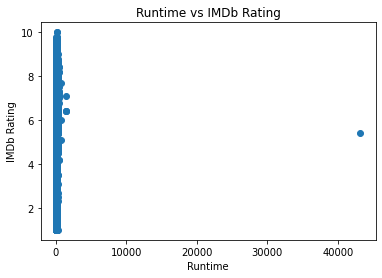

In [ ]:
plt.scatter(runtime,rating)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime')
plt.ylabel('IMDb Rating')
plt.show()

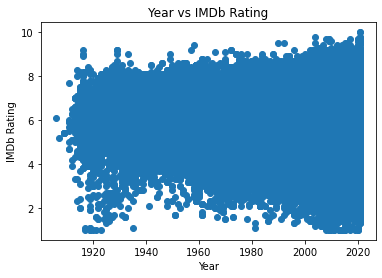

In [ ]:
plt.scatter(year,rating)
plt.title('Year vs IMDb Rating')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

1.Higher runtimes tend to have higher IMDb ratings, but for the vast majority of runtime, the IMDb ratings are spread from about 1 to 10, so it can’t be predicted using the feature by themselves.

2.For the Year vs IMDb rating scatter plot, the older years tend to have higher IMDb ratings, but the spread of IMDb ratings increases for more recent years


Correlation between the attributes of the given dataset

,isAdult,Year,runtimeMinutes,averageRating,numVotes
isAdult,1.000000,-0.042901,-0.023926,-0.029889,-0.028780
Year,-0.042901,1.000000,0.049548,-0.110806,0.084339
runtimeMinutes,-0.023926,0.049548,1.000000,0.032510,0.033183
averageRating,-0.029889,-0.110806,0.032510,1.000000,0.162222
numVotes,-0.028780,0.084339,0.033183,0.162222,1.000000


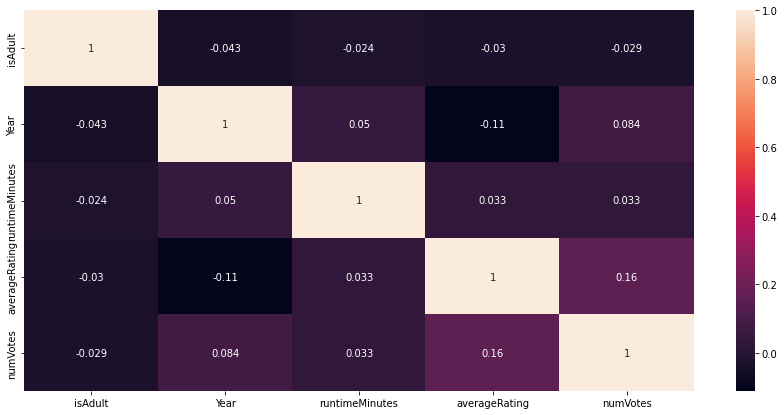

In [ ]:
plt.figure(figsize=(15,7))
corr_matrix=df_US.corr()
sns.heatmap(corr_matrix,annot=True)
corr_matrix

From above correlation matrix we find that there is a most significant correlation between number of votes-average rating

Finding top10 genre combination based on rating,runtime

In [ ]:
df_US.groupby('genres')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
genres,
"Documentary,Drama,Reality-TV",8.7
"Musical,Sport",8.7
"Comedy,Documentary,Sport",8.4
"Adventure,Documentary,Family",8.3
"Comedy,Mystery,Sport",8.3
"Documentary,Music,Musical",8.3
"Crime,Documentary,War",8.2
"Documentary,Drama,Musical",8.2
"Action,Comedy,Documentary",8.1


Combination of Documentary,Drama and Reality-TV has the highest average rating among all combination

In [ ]:
df_US.groupby('genres')[['runtimeMinutes']].mean().sort_values(by='runtimeMinutes',ascending=False).head(10)

,runtimeMinutes
genres,
"Animation,Comedy,Documentary",235.00
"Drama,Musical,Sport",181.00
"Fantasy,Musical,Sci-Fi",172.00
"Musical,Mystery,Thriller",170.00
"History,Musical,Romance",152.50
"Action,Musical,Romance",150.75
"Fantasy,War",141.00
"Biography,Family,History",140.00
"Musical,Romance,Thriller",139.50


Combination of Animation,Comedy,Documentary has the highest average runtime among all combination

Top 10 directors based on movie ratings which they directed

In [ ]:
df_US.groupby('Director')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Director,
Kayyam Upendra Kumar Nandhan,10.0
Gabriel Musco,9.8
Edouard Salier,9.7
Emilio Vega,9.7
Dornycya Suggs,9.7
Luke A. Renner,9.7
Randall Gifford,9.7
Carla Ricci,9.6
"Wmm Record, Wendo Musaly, Wendo Mbilizi",9.6


**Kayyam Upendra Kumar Nandhan** has the highest average rating among all directors

Top10 movies based on rating

In [ ]:
df_US.groupby('Moviename')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Moviename,
Miles of Love,10.0
Courageous Warriors Beauty from the Ashes,10.0
Ride Scare: the Beginning,9.8
El oscuro lugar donde habitan,9.8
Indocumentados,9.8
Tenets of the Maladjusted,9.7
Rickshawala,9.7
Caution! Heartache Ahead,9.7
Cuando volveras,9.7


**Miles of Love** has the highest average rating among all movies

Top10 movies based on runtime

In [ ]:
df_US.groupby('Moviename')[['runtimeMinutes']].mean().sort_values(by='runtimeMinutes',ascending=False).head(10)

,runtimeMinutes
Moviename,
Ambiancé,43200.0
****,1500.0
The Hazards of Helen,1428.0
"Out 1, noli me tangere",776.0
Amy's Night Out,675.0
Hele sa hiwagang hapis,485.0
The Works and Days (of Tayoko Shiojiri in the Shiotani Basin),480.0
Sátántangó,439.0
Les vampires,421.0


**Ambiancé** has the highest runtime among all movies

Top10 actors based on rating

In [ ]:
df_US.groupby('Actors')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Actors,
"Ramya Pasupileti, Kaushik Reddy, Medishetti Abhinav, Ravi Siva Teja",10.0
Louie Feher-Peiker,10.0
"Robert LuPone, Paul Calderon",9.8
"Franco Allen, Michael Fredianelli, Derek Crowe",9.8
"Nahuel Yotich, Fabio Rosenstein, Leandro Sandonato",9.8
Will Dalton,9.7
"Ricky Brava, Patricio Godoy, Angel Zermen",9.7
"Tim McGrath, Taylor Van Doorne, Mark E. Fletcher",9.7
Avinash Dwivedi,9.7


**Ramya Pasupileti, Kaushik Reddy, Medishetti Abhinav, Ravi Siva Teja** has the highest average rating among all actors combination

Number of movies year wise from 2011 to see the effect of covid-19 on movie industry

In [ ]:
df_latest=df_US[df_US['Year']>2010]
df_latest['Year'].value_counts()

2019    4171
2018    4039
2017    3892
2016    3629
2015    3487
2014    3447
2013    3304
2012    3197
2020    3191
2011    3021
2021    2418
Name: Year, dtype: int64

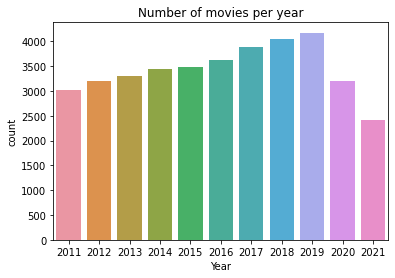

In [ ]:
sns.countplot(x='Year',data=df_latest)
plt.title('Number of movies per year')
plt.show()

From above graph we can say their is decrease in number of movies after 2019 i.e., Covid-19 has effected this industry 

Top Movies

In [ ]:
Top_50=df_US.sort_values('averageRating',ascending=False).head(50)
Top_5=Top_50[['Moviename','averageRating']].head(5)
Top_5

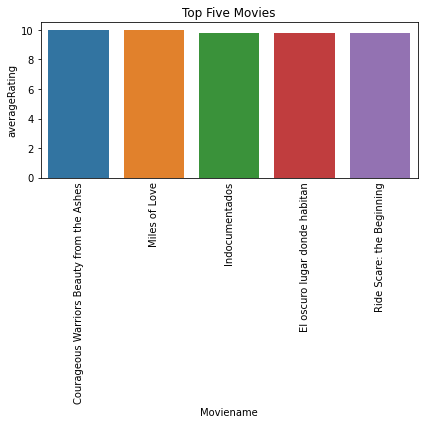

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Moviename',
            y = 'averageRating',
            data = Top_5)
plt.title('Top Five Movies')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Lowest rated movie

In [ ]:
df_US.groupby('Moviename')[['averageRating']].mean().sort_values(by='averageRating').head(1)

,averageRating
Moviename,
Gui men shi san zhen,1.0


Different genres and total count of movies genre wise

In [ ]:
l=[]
for x in df_US['genres']:
   l.append(x.split(','))

In [ ]:
genrelist=[]
for x in l:
   for y in x:
      genrelist.append(y)

In [ ]:
uniquegenre=[]
for x in genrelist:
  if x not in uniquegenre:
     uniquegenre.append(x)
print("The number of unique genres is: %d" %len(uniquegenre))    

The number of unique genres is: 27


In [ ]:
from collections import Counter
Counter(genrelist)


Counter({'Action': 17862,
         'Adult': 3192,
         'Adventure': 12433,
         'Animation': 2803,
         'Biography': 2808,
         'Comedy': 35690,
         'Crime': 15756,
         'Documentary': 1612,
         'Drama': 63455,
         'Family': 4713,
         'Fantasy': 5454,
         'Film-Noir': 1276,
         'History': 2563,
         'Horror': 15262,
         'Music': 2806,
         'Musical': 2866,
         'Mystery': 7881,
         'News': 32,
         'Reality-TV': 4,
         'Romance': 19433,
         'Sci-Fi': 5650,
         'Short': 3,
         'Sport': 1316,
         'Talk-Show': 5,
         'Thriller': 15466,
         'War': 2582,
         'Western': 4521})

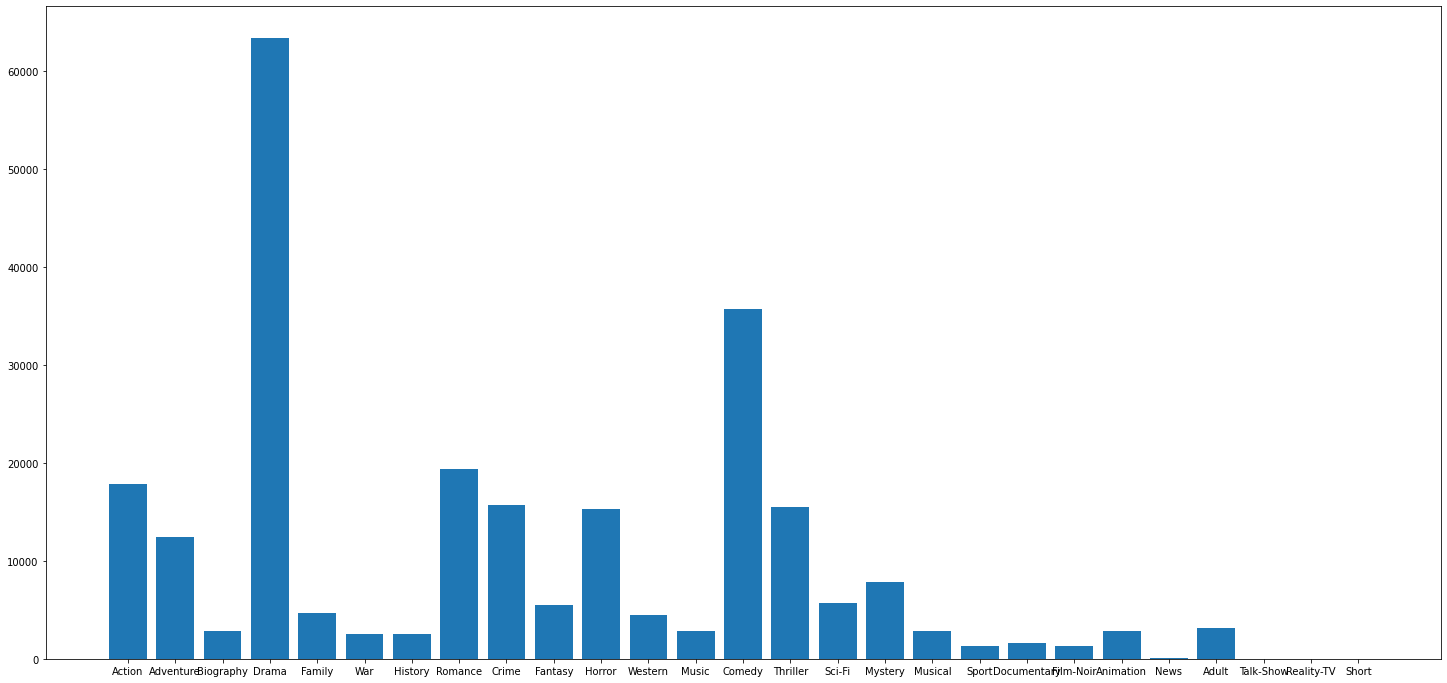

In [ ]:
fig,x=plt.subplots(figsize=(25,12))
plt.bar(d.keys(), d.values())
plt.show()

**Drama** Genre has most number of movies among all genres

Genre wise average rating from 2000 and plotting top 6 genre

In [ ]:
df_US_latest=df_US[df_US['Year']>=2000]
avgrating=[]
for x in uniquegenre:
      avgrating.append(df_US_latest[df_US_latest['genres'].str.contains(x)].averageRating.mean())

In [ ]:
genre_avgrating = pd.DataFrame(zip(uniquegenre,avgrating), columns =['Genre','AverageRating'])
genre_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
genre_avgrating=genre_avgrating.head(6)

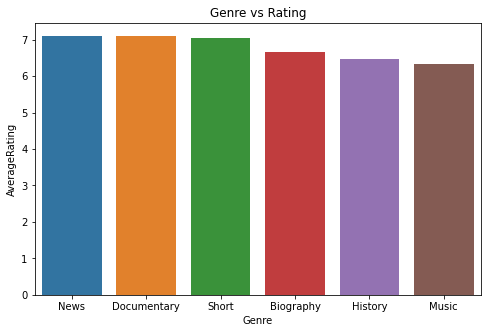

In [ ]:
fig,x=plt.subplots(figsize=(8,5))
sns.barplot(x = 'Genre',
            y = 'AverageRating',
            data = genre_avgrating)
plt.title('Genre vs Rating')
plt.show()

Movies in **News** Genre has the highest average rating

popularity of genre over time

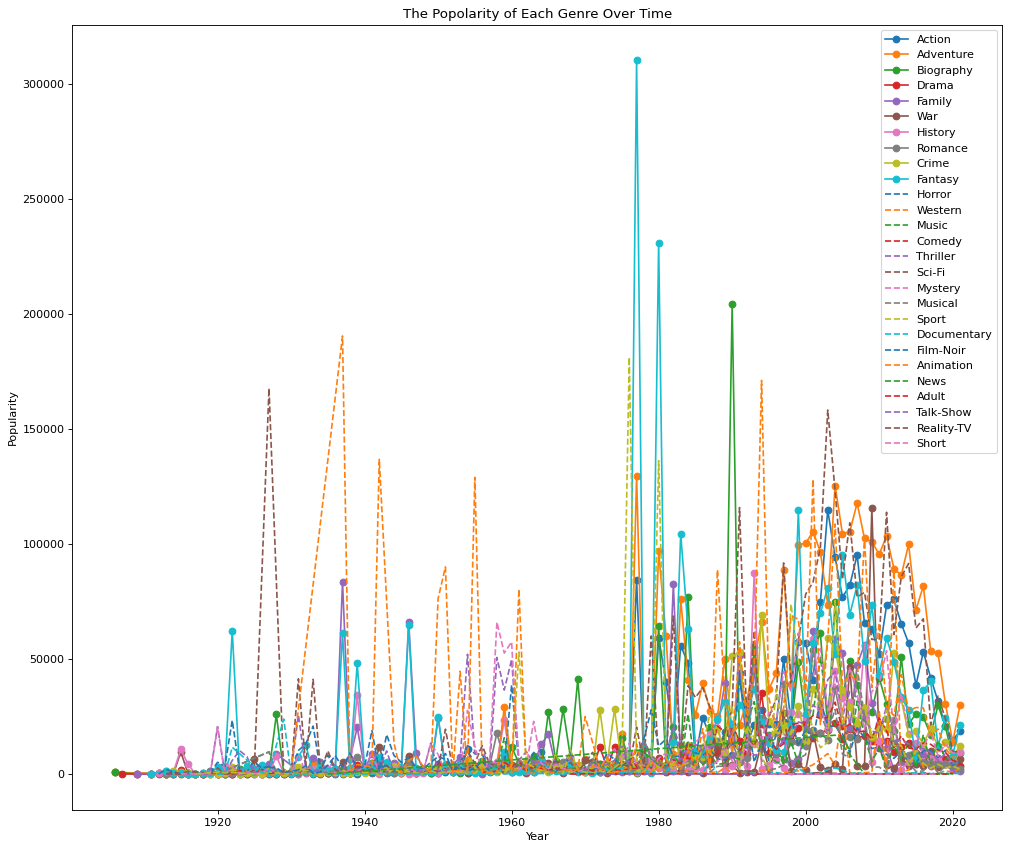

In [ ]:
genre =df_US['genres']
most_diff_min_max = 0
most_genre=""

plt.figure(figsize=(15, 13), dpi= 80, facecolor='w', edgecolor='k')
for i in range (len(uniquegenre)):
    A = df_US[genre.str.contains(uniquegenre[i])]
    a = A[['numVotes','Year']]
    p = a.groupby('Year').mean()
    p_mean = p['numVotes'].tolist()
    year = A['Year'].unique()
    year = np.sort(year)
    if i < 10:
        plt.plot(year, p_mean,'-o')
    else: 
        plt.plot(year, p_mean, '--')
    max = p.max()
    min = p.min()
    diff = float(max - min)
    if diff > most_diff_min_max:
        most_diff_min_max = diff
        most_genre = uniquegenre[i]
plt.legend(uniquegenre)
plt.title('The Popolarity of Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [ ]:
most_genre

'Fantasy'

The popularity of the **Fantasy** genre has increased most over the years for US

Average runtime (in minutes) for each genre from 2000 and plotting top 6

In [ ]:
avgtime=[]
for x in uniquegenre:
      avgtime.append(df_US_latest[df_US_latest['genres'].str.contains(x)].runtimeMinutes.mean())

In [ ]:
genre_avgtime = pd.DataFrame(zip(uniquegenre,avgtime), columns =['Genre','averageTime'])
genre_avgtime.sort_values('averageTime',ascending=False,inplace=True)
genre_avgtime=genre_avgtime.head(6)

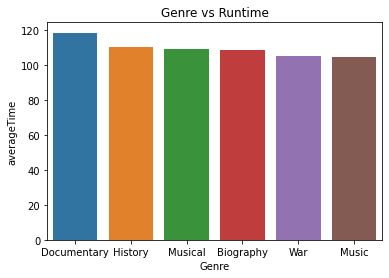

In [ ]:
sns.barplot(x = 'Genre',
            y = 'averageTime',
            data = genre_avgtime)
plt.title('Genre vs Runtime')
plt.show()

Movies of the **Documentary** genre has the highest average runtime

Actors

actors and total count of movies

In [ ]:
l=[]
for x in df_US['Actors']:
   l.append(x.split(', '))

In [ ]:
actorlist=[]
for x in l:
   for y in x:
            actorlist.append(y)           

In [ ]:
uniqueactors=[]
for x in actorlist:
  if x not in uniqueactors:
     uniqueactors.append(x)
print("The number of actors is %d" %len(uniqueactors))    

The number of actors is 102214


In [ ]:
from collections import Counter
c=Counter(actorlist)

Top 6 actors with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount


{'Eric Edwards': 230,
 'Eric Roberts': 170,
 'Jamie Gillis': 255,
 'John Leslie': 176,
 'John Wayne': 194,
 'Johnny Mack Brown': 176}

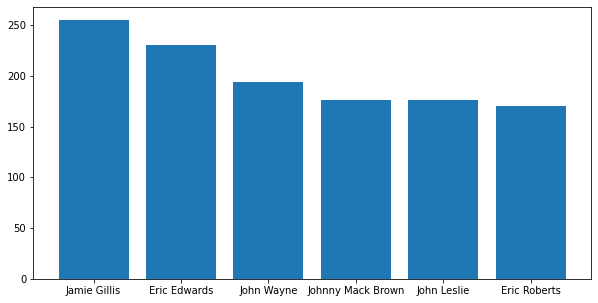

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each actor

In [ ]:
avgrating=[]
for x in uniqueactors:
      avgrating.append(df_US[df_US['Actors'].str.contains(x)].averageRating.mean())

In [ ]:
actor_avgrating = pd.DataFrame(zip(uniqueactors,avgrating), columns =['Actors','AverageRating'])
actor_avgrating.sort_values('AverageRating',ascending=False,inplace=True)


In [ ]:
actor_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
actor_avgrating.head(50).reset_index(drop=True)

,Actors,AverageRating
0,Ramya Pasupileti,10.0
1,Medishetti Abhinav,10.0
2,Louie Feher-Peiker,10.0
3,Ravi Siva Teja,10.0
4,Nahuel Yotich,9.8
5,Fabio Rosenstein,9.8
6,Leandro Sandonato,9.8
7,Patricio Godoy,9.7
8,Daniel Amat,9.7
9,Angel Zermen,9.7


Director

Different directors and total count of movies

In [ ]:
l=df_US['Director']
directorlist=[]
for x in l:
   for y in (x.split(', ')):
            directorlist.append(y)

In [ ]:
uniquedirectors=[]
for x in directorlist:
  if x not in uniquedirectors:
     uniquedirectors.append(x)
print("The number of directors is:%d"%len(uniquedirectors))    

The number of directors are:47118


In [ ]:
from collections import Counter
c=Counter(directorlist)

Top 6 directors with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount

{'John Ford': 162,
 'Lew Landers': 160,
 'Michael Curtiz': 170,
 'Richard Thorpe': 165,
 'Sam Newfield': 279,
 'William Beaudine': 186}

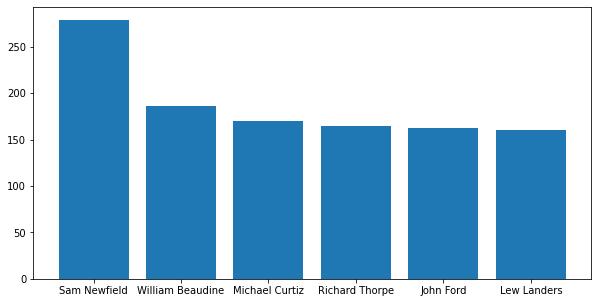

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each director

In [ ]:
avgrating=[]
for x in uniquedirectors:
      avgrating.append(df_US[df_US['Director'].str.contains(x)].averageRating.mean())

In [ ]:
director_avgrating = pd.DataFrame(zip(uniquedirectors,avgrating), columns =['Directors','AverageRating'])
director_avgrating.sort_values('AverageRating',ascending=False,inplace=True)


In [ ]:
director_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
director_avgrating.head(50).reset_index(drop=True)

,Directors,AverageRating
0,Kayyam Upendra Kumar Nandhan,10.0
1,Gabriel Musco,9.8
2,Randall Gifford,9.7
3,Dornycya Suggs,9.7
4,Emilio Vega,9.7
5,Luke A. Renner,9.7
6,Edouard Salier,9.7
7,Wmm Record,9.6
8,Wendo Musaly,9.6
9,Carla Ricci,9.6


Actress

Different actress and total count of movies

In [ ]:
l=df_US['Actress']
actresslist=[]
for x in l:
   for y in (x.split(', ')):
           actresslist.append(y)

In [ ]:
uniqueactress=[]
for x in actresslist:
  if x not in uniqueactress:
     uniqueactress.append(x)
print("The number of actress is:%d"%len(uniqueactress))    

The number of actress is:78699


In [ ]:
from collections import Counter
c=Counter(actresslist)

Top 6 actress with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount

{'Barbara Stanwyck': 132,
 'Bette Davis': 147,
 'Joan Blondell': 114,
 'Joan Crawford': 114,
 'Loretta Young': 114,
 'Zasu Pitts': 125}

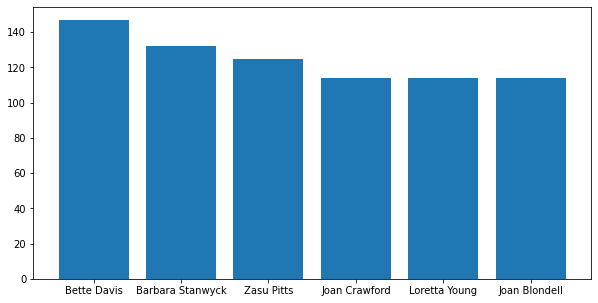

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each actress

In [ ]:
avgrating=[]
for x in uniqueactress:
      avgrating.append(df_US[df_US['Actress'].str.contains(x)].averageRating.mean())

In [ ]:
actress_avgrating = pd.DataFrame(zip(uniqueactress,avgrating), columns =['Actress','AverageRating'])
actress_avgrating.sort_values('AverageRating',ascending=False,inplace=True)

In [ ]:
actress_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
actress_avgrating.head(50).reset_index(drop=True)

,Actress,AverageRating
0,Vismaya Sri,10.0
1,Yung Te Wang Angelica,10.0
2,Rosalba Costillo,10.0
3,Grace Ulloa,9.8
4,Kasturi Chakraborty,9.7
5,Rosebud Baker,9.7
6,Mabel Heredia,9.7
7,BernNadette Stanis,9.7
8,Sangita Sinha,9.7
9,Rika Harrison,9.7


Converting ratings into four categories and finding count of each category



In [ ]:
def rating(rating):
  if rating >=7.5:
    return 'Excellent'
  elif rating >=6:
    return 'Good'  
  elif rating >=4:
    return 'Average' 
  else:
    return 'Flop'

In [ ]:
df_US['Rating']=df_US['averageRating'].apply(rating)

Finding the percentage of movie belonging to each rating category

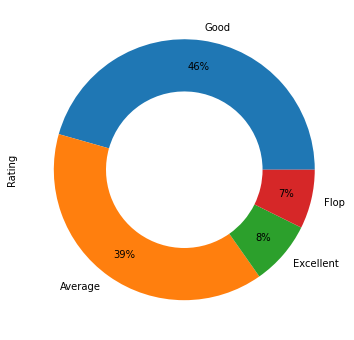

In [ ]:
df_US.Rating.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

Converting runtime into three categories

In [ ]:
def run_t(rtime):
  if rtime >=150:
    return 'Long'
  elif rtime >=90:
    return 'Medium'  
  else:
    return 'Short'

In [ ]:
df_US['type']=df_US['runtimeMinutes'].apply(run_t)

Finding the percentage of movie belonging to each runtime type

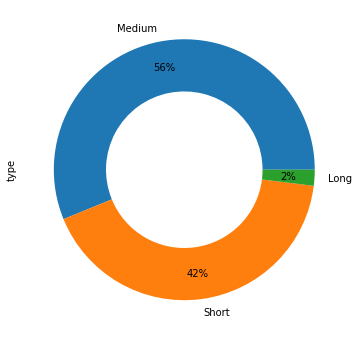

In [ ]:
df_US.type.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

Analysis of the whether type of movie affect rating or votes

In [ ]:
df_US.groupby('type').numVotes.mean()

type
Long      56112.252156
Medium    16342.005176
Short      2192.947126
Name: numVotes, dtype: float64

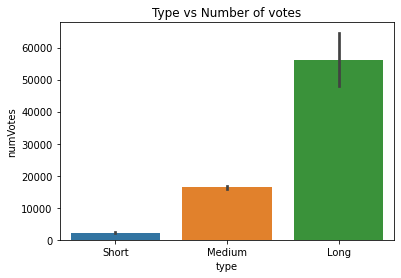

In [ ]:
sns.barplot(x = 'type',
            y = 'numVotes',
            data=df_US)
plt.title('Type vs Number of votes')
plt.show()

The movies with **long** runtime has highest average number of votes

In [ ]:
df_US.groupby('type').averageRating.mean()

type
Long      6.756222
Medium    6.023137
Short     5.705508
Name: averageRating, dtype: float64

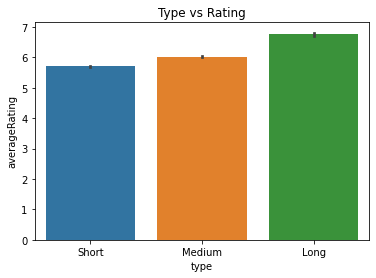

In [ ]:
sns.barplot(x = 'type',
            y = 'averageRating',
            data=df_US)
plt.title('Type vs Rating')
plt.show()

movies with **long** runtime has the highest average Rating

Finding yearwise top100 movies from year 1980

In [ ]:
df_year=df_US[df_US['Year']>=1980]
df_year=df_year.groupby('Year').head(100)
df_year=df_year.sort_values('Year',ascending=False).reset_index(drop=True)

Average rating yearwise from 2009



In [ ]:
df_year=df_US[df_US['Year']>=2009]
df_year=(df_year.groupby(df_year['Year'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('averageRating',ascending=False,inplace=True)
df_year=df_year[['Year','averageRating']].reset_index(drop=True)
df_year

,Year,averageRating
0,2021,5.934285
1,2011,5.866170
2,2013,5.865496
3,2010,5.860748
4,2012,5.852018
5,2014,5.841253
6,2009,5.827569
7,2015,5.813134
8,2016,5.809286
9,2017,5.796865


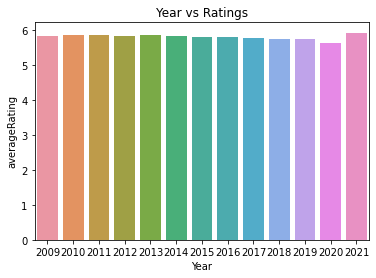

In [ ]:
sns.barplot(x = 'Year',
            y = 'averageRating',
            data = df_year)
plt.title('Year vs Ratings')
plt.show()

Average votes yearwise from 2009

In [ ]:
df_year=df_US[df_US['Year']>=2009]
df_year=(df_year.groupby(df_year['Year'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('numVotes',ascending=False,inplace=True)
df_year=df_year[['Year','numVotes']].reset_index(drop=True)

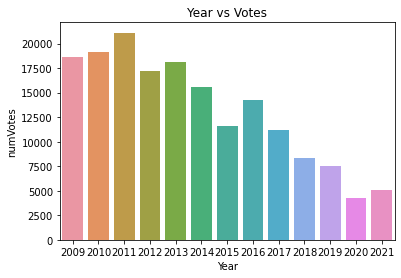

In [ ]:
sns.barplot(x = 'Year',
            y = 'numVotes',
            data = df_year)
plt.title('Year vs Votes')
plt.show()

The number of votes is decreasing over the years with some fluctuation

Change in duration of movies over years

In [ ]:
grouped_year=df_US['runtimeMinutes'].groupby(df_US['Year']).describe()
avg_runtime_by_year=grouped_year['mean']
avg_runtime_min=grouped_year['mean']-grouped_year['std']
avg_runtime_max=grouped_year['mean']+grouped_year['std']

<function matplotlib.pyplot.show>

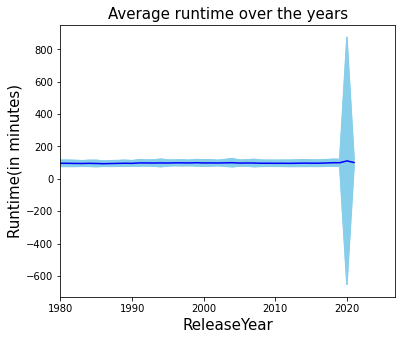

In [ ]:
fig,x=plt.subplots(figsize=(6,5))
x.plot(avg_runtime_by_year,color='blue')
x.plot(avg_runtime_min,color='skyblue')
x.plot(avg_runtime_max,color='skyblue')
x.fill_between(grouped_year.index,avg_runtime_min,avg_runtime_max,color='skyblue')
x.set_title('Average runtime over the years',fontsize=15)
x.set_xlabel('ReleaseYear',fontsize=15)
x.set_ylabel('Runtime(in minutes)',fontsize=15)
x.set_xlim(1980)
plt.show

Change in duration of movies over decade

In [ ]:
decade=df_US.copy()
decade['releaseYear']=((decade['Year']//10)*10).astype('int64')

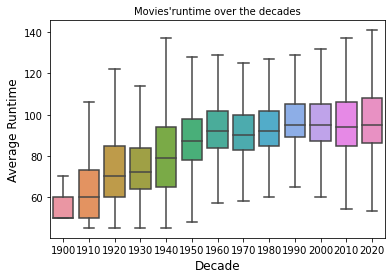

In [ ]:
sns.boxplot(x='releaseYear',y='runtimeMinutes',data=decade,showfliers=False)
plt.title('Movies\'runtime over the decades',fontsize=10)
plt.xlabel('Decade',fontsize=12)
plt.ylabel('Average Runtime',fontsize=12)
plt.show()

Movie runtime has not changed much over the time